# **Milestone 1**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights:**
 - The dataset has 5960 rows and 13 columns

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### **Check for missing values**

In [8]:
# Analyse missing values - Hint: use isnull() function
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
(data.isnull().sum()/data.shape[0])*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights:**
 - I will set the threshold to 9%
 - % of Missing Values (highest to lowest):
     - DEBTINC = 21%
     - DEROG = 12%
     - DELINQ = 10%

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable

data[i].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights:**
    
    - The average current VALUE of property(s) is $101,776.05 for applicants.
    
    - The average LOAN amount approved is $18,607.97 and the median is 16,300.00. 
    
    - The average number of delinquent credit lines is 0, with the highest of 15.
    
    - the average age of credit line is is approximately 180 months

In [15]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights:**

    - Of 2 REASON catagories, DebtCon has topped with a frequency of 3928
    - Of 6 JOB catagories, Other has topped with a frequency of 2388

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


**Insights:**
    
    - Under REASON for the loan request:
        - approximately 31% of applicants apply for loans to make home improvement 
        - approx. 70% of applicants apply for loans for debt consolidation 
    
    - Under JOBs:
        - We can see a majority of applicants of approximately 42% belong in "other" job category. 
        - Professional Executives make the second highest number of applicants of approximately 22%
        - Applicants that are self-employed and in sales are of the lowest values of 3% and 2% respectively.

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

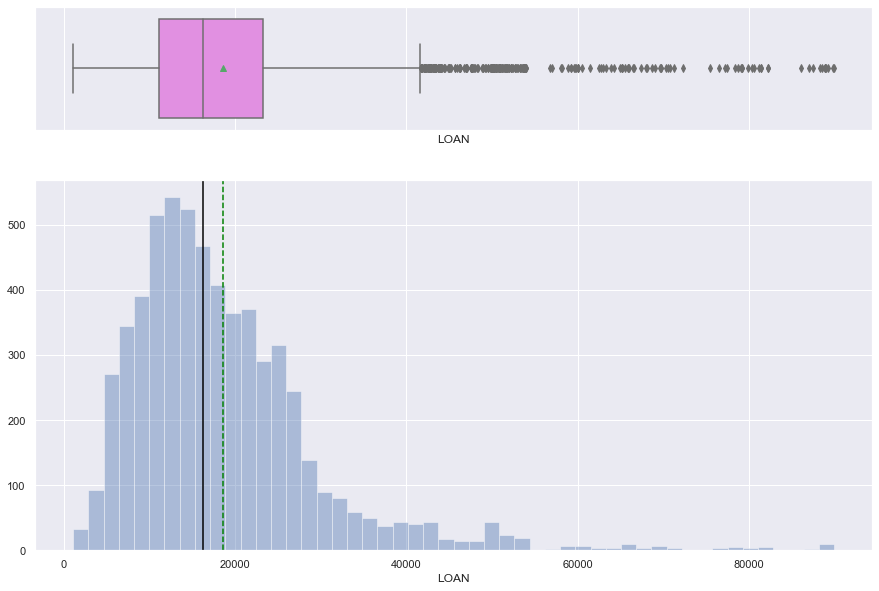

In [18]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights:** The variable LOAN is a right skewed distribution which means that there are certain items whose percentage of display area is much higher than the other items

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

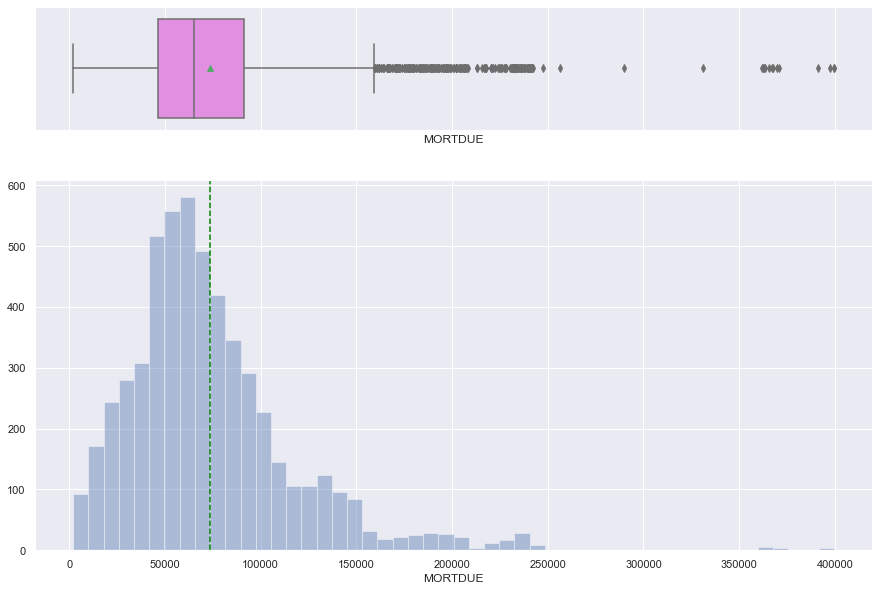

In [21]:
histogram_boxplot(data['MORTDUE'])

In [ ]:
histogram_boxplot(data['VALUE'])

In [ ]:
histogram_boxplot(data['YOJ'])

In [ ]:
histogram_boxplot(data['DEROG'])

In [ ]:
histogram_boxplot(data['DELINQ'])

In [ ]:
histogram_boxplot(data['CLAGE'])

In [ ]:
histogram_boxplot(data['NINQ'])

In [ ]:
histogram_boxplot(data['CLNO'])

In [ ]:
histogram_boxplot(data['DEBTINC'])

**Insights:** 
    - The Amount Due on the Existing Mortgage data is skewed to the right (the mean is greater than the median).
There is a significant number of outliers for higher Amounts Due.
    - The Current Value of the Property data is skewed to the right (the mean is greater than the median).
There is a significant number of outliers for higher Current Values of the property.
    - The Years At Present Job data has a higher frequency for smaller values for Years At Present job
75% of clients have 15 years or less at present job. There are some outliers
    - The majority of clients have 0 Major Derogatory reports. The mean for Number of Major Derogatory Reports is less than 1. No client has more than 10 Major Derogatory Reports.
    - The majority of clients have 0 Delinquent Credit Lines. The mean for Number of Major Delinquent Credit Lines is less than 1. No client has more than 15 Major Delinquent Credit Lines.
    - The Number of Age of The Oldest Credit Line data appears to be a bimodal distribution. The Mean and Median for Number of Age of the Oldest Credit Line data are similar. There is a significant number of outliers for higher values for Age of The Oldes Credit Line data.
    - The majority of clients have 0 or 1 Recent Credit Inquiries. The mean for Number of Recent Credit Inquiries is less than 1.25. No client has more than 17 Recent Credit Inquiries.
    - The distribution for Number of Existing Credit Lines slightly resembles a normal distribution. There are some outlier values for higher values of Existing Credit Lines. The mean for the Number of Existing Credit Lines is slightly above 20.
    - The distribution for Debt-to-income ratio resembles a normal distribution. There are some outlier values for higher values Debt-to-income ratio. The majority of clients have a Debt-to-income ratio lower than 50%

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

In [ ]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights:** The variable DELINQ is a right skewed distribution which means that there are certain items whose percentage of display area is much higher than the other items

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

NameError: name 'perc_on_bar' is not defined

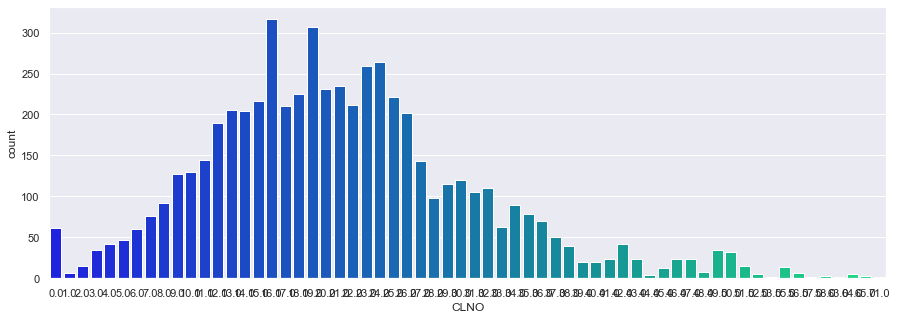

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["CLNO"],palette='winter')
perc_on_bar(ax,data["CLNO"])

**Insights:** 
    - 76.0%, the majority, of clients have 0 number of major derogatory reports. 07.3% have 1 major derogatory report.
    - 65.9%, the majority, of clients took a home equity loan to consolidate debt. 29.9% of clients took a home equity loan to complete home improvements.
    - 40.1% of clients took have 'other' job. 21.4% of clients took have 'ProfExe' job. Less than 5% of clients are 'self' employed or work in 'sales'.
    - 42.5% of clients have 0 recent credit inquiries. 22.5% of clients have 1 recent credit inquiry. 13.1% of clients have 2 recent credit inquiries.
    - The distribution for Number of Existing Credit Lines slightly resembles a normal distribution. There are some outlier values for higher values of Existing Credit Lines. The mean for the Number of Existing Credit Lines is slightly above 20
    -

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

In [ ]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights:**
    
    - There is a positive correlation between BAD (target) and LOAN amount.
    
    - 1 = defaulters, 
    - 0 = loan repaid 
    
    - Increased LOAN amount increased the number of defaulters
    
    - We can infer that this could be probably due to inability to pay back the high amounts.

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

In [ ]:
sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")

In [ ]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

In [ ]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")

In [ ]:
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu")

In [ ]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")

In [ ]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

In [ ]:
sns.boxplot(data["BAD"],data['NINQ'],palette="PuBu")

In [ ]:
sns.boxplot(data["BAD"],data['CLNO'],palette="PuBu")

In [ ]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

**Insights:**
    - MORTDUE amounts for both BAD categories appear to be similar.
    - Value amonts for Outliers for BAD = 1 are higher than those for BAD = 0 (non loan defaulters)
    - It seems like clients who don't default their loans have stayed at their current jobs for a little longer.
    - It seems that clients who do not default in their loans but have Derogatory reports are considered outliers.
Conversely, it seems that having a Derogatory report is more common among clients who default on their loans.
    - It seems that clients who do not default in their loans but have Delinquent Credit Lines are considered outliers. Conversely, it seems that having a Delinquent Credit Line is more common among clients who default on their loans.
    - It seems that in general clients who do not default on their loans have had credit lines for a slightly longer timeframe.
    - There seems to be a relationshin between defaulting a loan and the number of recent credit inquiries.
    - There seems to be a relationshin between defaulting a loan and the number of existing credit lines.
    - There seems to be a relationshin between defaulting a loan and debt-to-income ratio.

### **Bivariate Analysis: Two Continuous Variables**

In [ ]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights:** 

    - There is a clear positive correlation between the variables VALUE and MORTDUE 
    
    - The current value of the property would have a good predictive power to predict the amount due on the existing mortgage.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

In [ ]:
sns.scatterplot(data["VALUE"],data['LOAN'],palette="PuBu")

In [ ]:
sns.scatterplot(data["LOAN"],data['MORTDUE'],palette="PuBu")

In [ ]:
sns.scatterplot(data["LOAN"],data['YOJ'],palette="PuBu")

In [ ]:
sns.scatterplot(data["LOAN"],data['DEROG'],palette="PuBu")

In [ ]:
sns.scatterplot(data["LOAN"],data['DELINQ'],palette="PuBu")

In [ ]:
sns.scatterplot(data["LOAN"],data['CLAGE'],palette="PuBu")

In [ ]:
sns.scatterplot(data["LOAN"],data['NINQ'],palette="PuBu")

In [ ]:
sns.scatterplot(data["LOAN"],data['CLNO'],palette="PuBu")

In [ ]:
sns.scatterplot(data["LOAN"],data['DEBTINC'],palette="PuBu")

**Insights:** 
    - there seems to be a slight positive relationship between value and loan. This relationship is not stronger perhaps because not all loan applicants apply for the same % of a home's property value.
    - Value and mortdue amounts are in some sense slightly positively correlated, this neeeds to be further investigated. In cases where there is no correlation it is possible that this is explained by loans that have been defaulted.
    - It appears that there is no relationship between loan amount and number of years in the job.
    - 
    - It appears that clients with higher loan amounts also have fewer delinquent credit lines.
    - No apparent correlation can be observed between loan amount and the client's oldest credit line.
    - Loan amount and Number of recent credit inquiries appear to be negatively correlated.
    - Loan amount and the number of existing credit lines seem to be inversely correlated.
    - It appears that debt-to-income ratios are more disperse for smaller loans.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights:**
        
        - Of 5,708 observations, 3,928 applicants applied for debt consolidation and 1,780 applied for home improvements, regardless of loan repayment status
            - The summary stats for categorical data, we observed:
            - approximately 31% of applicants apply for loans to make home improvement 
            - approx. 70% of applicants apply for loans for debt consolidation
        - 4,567 were for applicants who paid their loans, whereas 1,141 were defaulters
        - It appears that the reason for requesting a loan had impact on whether a loan will be defaulted.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

In [ ]:
stacked_plot(data['JOB'])

In [ ]:
stacked_plot(data['DEROG'])

In [ ]:
stacked_plot(data['DELINQ'])

In [ ]:
stacked_plot(data['NINQ'])

**Insights:**
    - Some employment selections in the application process seem to be more strongly correlated to loan defaults.
    - Fewer derogatory reports seem to indicate a lower chance of default.
    - Fewer delinquent credit lines indicate a lower likelihood of loan defaults
    - Fewer number of recent credit inquiries seem to also indicate a lower chance to default a loan.
    
Via Bivariate Analysis this continues to hold true as there are more applicants who appied for debt consolidation than home improvements. 

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

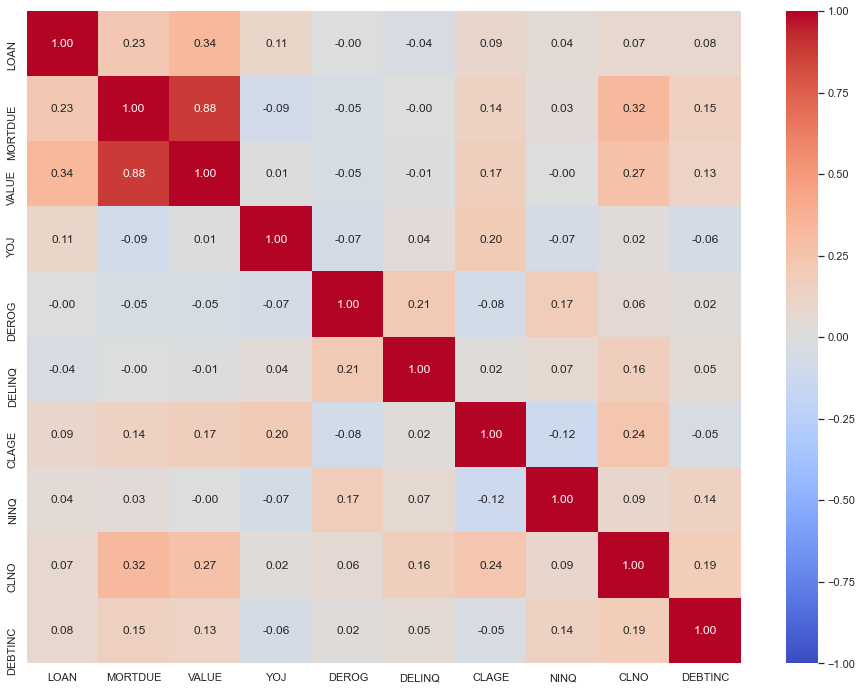

In [22]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

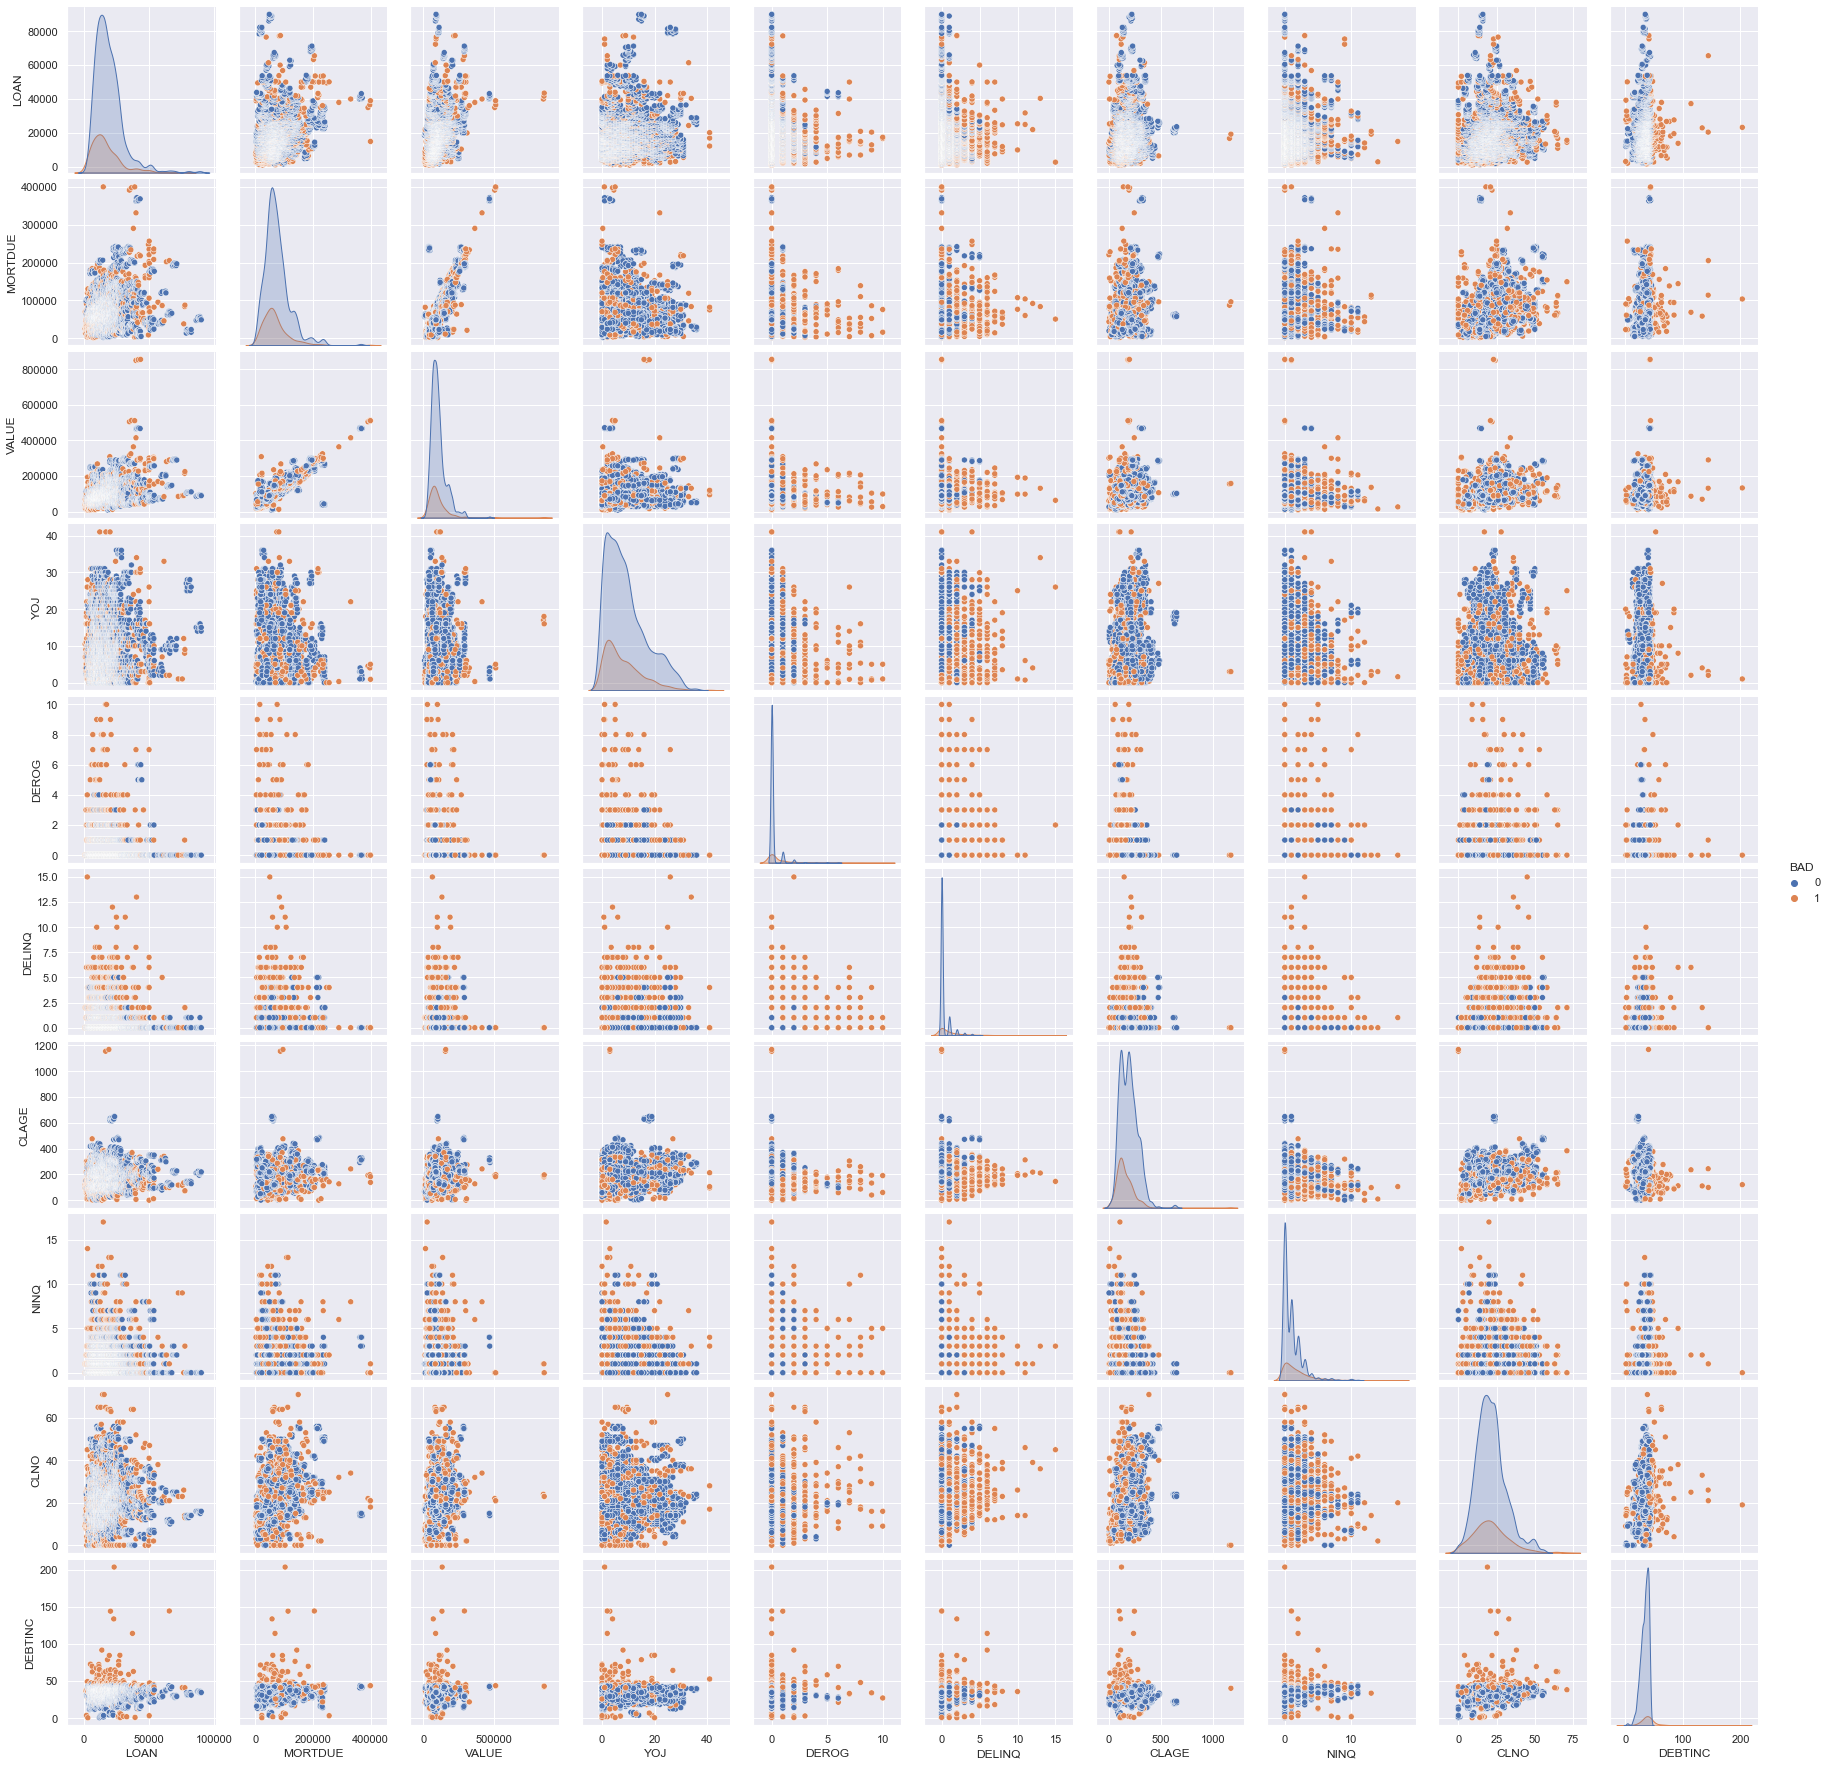

In [23]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data, hue = 'BAD')

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1= df.quantile(0.25) # 25th quantile
    Q3= df.quantile(0.75)  # 75th quantile
    IQR= Q3 - Q1   # IQR Range
    Lower_Whisker = Q1-(1.5*IQR)  #define lower whisker
    Upper_Whisker = Q3+(1.5*IQR)  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()
ob_data = data.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median(), inplace=True)

# Fill object columns with mode.

for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode(), inplace=True)

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?

**2. Overall solution design** - What is the potential solution design?

**3. Measures of success** - What are the key measures of success?